<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Task-1:-Data-Preparation-and-Exploration" data-toc-modified-id="Task-1:-Data-Preparation-and-Exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Task 1: Data Preparation and Exploration</a></span></li><li><span><a href="#Task-2:-Model-Training-Using-Decision-Tree-Classifier" data-toc-modified-id="Task-2:-Model-Training-Using-Decision-Tree-Classifier-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Task 2: Model Training Using Decision Tree Classifier</a></span></li><li><span><a href="#Task-3:-Model-Training-Using-Random-Forest-Classifier" data-toc-modified-id="Task-3:-Model-Training-Using-Random-Forest-Classifier-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Task 3: Model Training Using Random Forest Classifier</a></span></li><li><span><a href="#Task-4:-Exploring-Various-Parameters-in-Random-Forest-Classifier" data-toc-modified-id="Task-4:-Exploring-Various-Parameters-in-Random-Forest-Classifier-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Task 4: Exploring Various Parameters in Random Forest Classifier</a></span></li><li><span><a href="#Task:5-predict-the-cancer-outcome" data-toc-modified-id="Task:5-predict-the-cancer-outcome-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Task:5 predict the cancer outcome</a></span></li><li><span><a href="#6:-Decision-Rule" data-toc-modified-id="6:-Decision-Rule-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>6: Decision Rule</a></span></li></ul></div>

### Problem Statement

As a data scientist / AI engineer at a medical research firm. I have been provided with a dataset named **`"cancer_data.csv"`**, which includes medical and lifestyle information for 1500 patients. The dataset is designed to predict the presence of cancer based on various features. The dataset comprises the following columns:

- `age:` Integer values representing the patient's age, ranging from 20 to 80.
- `gender:` Binary values representing gender, where 0 indicates Male and 1 indicates Female.
- `bmi:` Continuous values representing Body Mass Index, ranging from 15 to 40.
- `smoking:` Binary values indicating smoking status, where 0 means No and 1 means Yes.
- `genetic_risk:` Categorical values representing genetic risk levels for cancer, with 0 indicating Low, 1 indicating Medium, and 2 indicating High.
- `physical_activity:` Continuous values representing the number of hours per week spent on physical activities, ranging from 0 to 10.
- `alcohol_intake:` Continuous values representing the number of alcohol units consumed per week, ranging from 0 to 5.
- `cancer_history:` Binary values indicating whether the patient has a personal history of cancer, where 0 means No and 1 means Yes.
- `diagnosis:` Binary values indicating the cancer diagnosis status, where 0 indicates No Cancer and 1 indicates Cancer.

  
My task is to use this dataset to build and compare the performance of Decision Tree and Random Forest models to predict the presence of cancer. Additionally, explore various parameters of the RandomForestClassifier to enhance model performance.

**Dataset credits:** Rabie El Kharoua (https://www.kaggle.com/datasets/rabieelkharoua/cancer-prediction-dataset)

**Import Necessary Libraries**

In [18]:
#import necessary libraries
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Task 1: Data Preparation and Exploration

1. Import the data from the `"cancer_data.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Check for any missing values in the dataset.

In [3]:
# Step 1: Import the data from the "cancer_data.csv" file and store it in a variable 'df'
df = pd.read_csv('cancer_data.csv')

# Step 2: Display the number of rows and columns in the dataset
print(f"the shape of the data is:{df.shape}")

# Step 3: Display the first few rows of the dataset to get an overview
df.head()

the shape of the data is:(1500, 9)


,age,gender,bmi,smoking,genetic_risk,physical_activity,alcohol_intake,cancer_history,diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040295,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


In [4]:
# Step 4: Check for any missing values in the dataset
df.isna().sum()

age                  0
gender               0
bmi                  0
smoking              0
genetic_risk         0
physical_activity    0
alcohol_intake       0
cancer_history       0
diagnosis            0
dtype: int64

### Task 2: Model Training Using Decision Tree Classifier

1. Select the features `(age, gender, bmi, smoking, genetic_risk, physical_activity, alcohol_intake, cancer_history)` and the target variable `(diagnosis)` for modeling.
2. Split the data into training and test sets with a test size of 25%.
3. Initialize and train a Decision Tree Classifier model using the training data.
4. Make predictions on the test set using the trained model.
5. Evaluate the model using a classification report and print the report.

In [12]:
# Step 1: Select the features and target variable for modeling
X = df[['age', 'gender', 'bmi', 'smoking', 'genetic_risk', 'physical_activity', 'alcohol_intake', 'cancer_history']]
y = df['diagnosis']
# Step 2: Split the data into training and test sets with a test size of 25%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       231
           1       0.86      0.77      0.81       144

    accuracy                           0.86       375
   macro avg       0.86      0.85      0.85       375
weighted avg       0.86      0.86      0.86       375



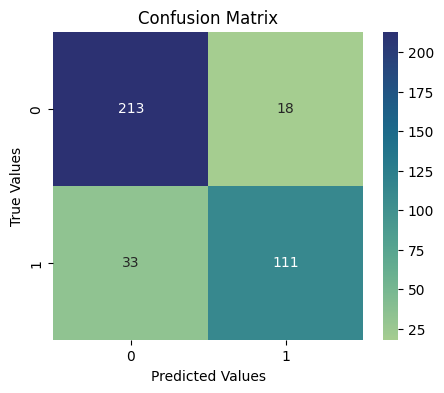

In [24]:
# Step 3: Initialize and train a Decision Tree Classifier model using the training data
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Step 4: Make predictions on the test set using the trained model
y_pred_dt = tree_model.predict(X_test)

# Step 5: Evaluate the model using a classification report and print the report
report_dt = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:")
print(report_dt)

# Step 6: confusion metrics

cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='crest')

plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("Confusion Matrix")

plt.show()

### Task 3: Model Training Using Random Forest Classifier

1. Initialize and train a Random Forest Classifier model with 25 estimators using the training data.
2. Make predictions on the test set using the trained model.
3. Evaluate the model using a classification report and print the report.

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       231
           1       0.93      0.84      0.88       144

    accuracy                           0.91       375
   macro avg       0.92      0.90      0.91       375
weighted avg       0.92      0.91      0.91       375



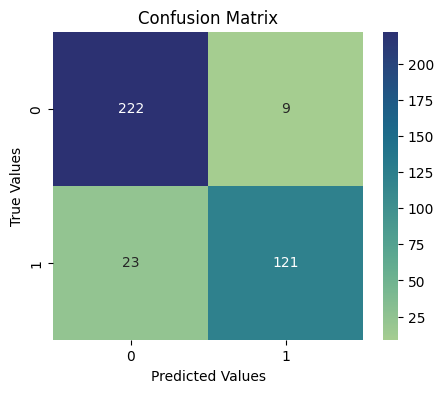

In [25]:
# Step 1: Initialize and train a Random Forest Classifier model with 25 estimators using the training data
rf_model = RandomForestClassifier(n_estimators=25)
rf_model.fit(X_train, y_train)

# Step 2: Make predictions on the test set using the trained model
y_pred_rf = rf_model.predict(X_test)

# Step 3: Evaluate the model using a classification report and print the report
report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:")
print(report_rf)

# Step 4: confusion metrics

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='crest')

plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("Confusion Matrix")

plt.show()

### Task 4: Exploring Various Parameters in Random Forest Classifier

1. Train a Random Forest model with the following parameters:
   - n_estimators = 50
   - max_features = "log2"
   - criterion = "entropy"
   - bootstrap = False
   - max_depth = 15
   - min_samples_split = 5
   - min_samples_leaf = 3

Learn about these parameters here: [scikit-learn RandomForestClassifier Parameters](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)


--------------------------------------------------------------------------------------------------------------------------------------------------------
2. Evaluate the model using a classification report and print the report.

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       231
           1       0.93      0.86      0.90       144

    accuracy                           0.92       375
   macro avg       0.92      0.91      0.92       375
weighted avg       0.92      0.92      0.92       375



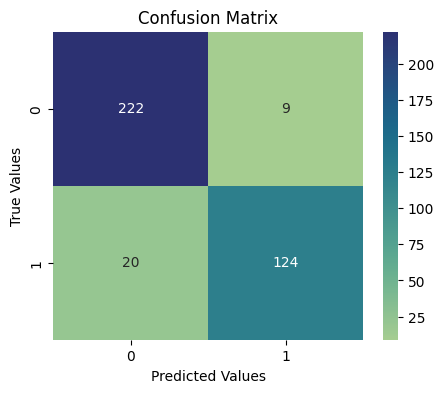

In [26]:
# Step 1: Initialize and train a Random Forest Classifier model with 25 estimators using the training data
rf_model = RandomForestClassifier(n_estimators=50, max_features='log2', criterion= 'entropy', bootstrap= False, max_depth=15, min_samples_split= 5, min_samples_leaf= 3)
rf_model.fit(X_train, y_train)

# Step 2: Make predictions on the test set using the trained model
y_pred_rf = rf_model.predict(X_test)

# Step 3: Evaluate the model using a classification report and print the report
report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:")
print(report_rf)

# Step 4: confusion metrics

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='crest')

plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("Confusion Matrix")

plt.show()

### Task:5 predict the cancer outcome

In [28]:
#Predict diagnosis
new_patient = pd.DataFrame([{
    "age": 55,
    "gender": 1,
    "bmi": 28.5,
    "smoking": 1,
    "genetic_risk": 2,
    "physical_activity": 1,
    "alcohol_intake": 2,
    "cancer_history": 1
}])
prediction = rf_model.predict(new_patient)
print("Diagnosis:", prediction[0])


Diagnosis: 1


In [30]:
# predicting probability

probability = rf_model.predict_proba(new_patient)
print("Probability of diagnosis:", probability[0][1])


Probability of diagnosis: 0.9985714285714287


In [31]:
# calculating feature importance answering which feature matters the most
features = [
    "age", "gender", "bmi", "smoking",
    "genetic_risk", "physical_activity",
    "alcohol_intake", "cancer_history"
]

importance = rf_model.feature_importances_

importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

print(importance_df)

             Feature  Importance
6     alcohol_intake    0.156418
2                bmi    0.154071
5  physical_activity    0.146405
7     cancer_history    0.144758
0                age    0.138708
4       genetic_risk    0.104970
1             gender    0.082968
3            smoking    0.071702


### 6: Decision Rule

In [33]:
if probability[0][1] > 0.7:
    print("High risk – recommend medical screening")
elif probability[0][1] > 0.4:
    print("Medium risk – lifestyle changes advised")
else:
    print("Low risk")

High risk – recommend medical screening
